<a href="https://colab.research.google.com/github/Advanced-Data-Science-TU-Berlin/Data-Science-Training-Python-Part-2/blob/main/notebooks/6_1_Reporting_and_Benchmarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Classification Notebook: Reporting and Benchmarking

In machine learning projects, benchmarking refers to the process of establishing a baseline performance metric that represents the minimum acceptable level of performance for a given task or problem. The benchmark serves as a reference point against which the performance of more complex models or approaches can be compared. Benchmarking is a crucial step in the evaluation and improvement of machine learning models.

## Overview

This Jupyter notebook provides a comprehensive guide to reporting, benchmarking, and improving a machine learning model using the Titanic dataset. The primary focus is on evaluating the performance of a K-Nearest Neighbors (KNN) classifier, creating a simple benchmark, and suggesting areas for further exploration and improvement.


In [88]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve )

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Contents

1. **Data Loading and Preprocessing:**
   - Load the Titanic dataset and perform necessary preprocessing steps.

In [3]:
# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

# Display the first few rows of the dataset
titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
# Handle missing values

# Drop 'Cabin' column due to high missing values
titanic_df = titanic_df.drop('Cabin', axis=1)

# Fill missing values in 'Age' with the median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Handle categorical features

# Convert 'Sex' to numerical values (0 for Female, 1 for Male)
titanic_df['Sex'] = titanic_df['Sex'].map({'female': 0, 'male': 1})

# Convert 'Embarked' to numerical values using one-hot encoding
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=True)


2. **Building and Training a Simple Baseline Classifier:**
   - Select relevant features, split the dataset, and train a KNN classifier.

In [6]:
# Select relevant features for classification
X = titanic_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]
y = titanic_df['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Benchmarking:**
   - Create a simple baseline model by predicting the majority class.

In [10]:
baseline_model = DummyClassifier(strategy='most_frequent')
baseline_model.fit(X_train_scaled, y_train)

DummyClassifier(strategy='most_frequent')

3. **Model Evaluation:**
   - Evaluate the baseline classifier using metrics such as accuracy, confusion matrix, and classification report.

   > About the warning: some labels in y_test don't appear in y_pred. In this case, label '1' is never predicted:

In [33]:
# Evaluate the baseline model
y_pred_baseline = baseline_model.predict(X_test_scaled)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
conf_matrix_baseline = confusion_matrix(y_test, y_pred_baseline)
classification_rep_baseline = classification_report(y_test, y_pred_baseline)

# Display baseline model metrics
print(f"Baseline Model Accuracy: {accuracy_baseline:.2f}")
print("\nBaseline Model Confusion Matrix:")
print(conf_matrix_baseline)
print("\nBaseline Model Classification Report:")
print(classification_rep_baseline)

Baseline Model Accuracy: 0.59

Baseline Model Confusion Matrix:
[[105   0]
 [ 74   0]]

Baseline Model Classification Report:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       105
           1       0.00      0.00      0.00        74

    accuracy                           0.59       179
   macro avg       0.29      0.50      0.37       179
weighted avg       0.34      0.59      0.43       179



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4. Trying Different Models

Building and Training a K-Nearest Neighbors (KNN) Classifier

In [7]:
# Create and train the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

5. **Model vs. Benchmark Comparison:**
   - Visualize and compare the accuracy of the KNN model with the benchmark.

In [57]:
# Evaluate the KNN classifier
y_pred_knn = knn_classifier.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

# Display KNN classifier metrics
print("\nK-Nearest Neighbors (KNN) Model Metrics:")
print(f"Accuracy: {accuracy_knn:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_knn)
print("\nClassification Report:")
print(classification_rep_knn)


K-Nearest Neighbors (KNN) Model Metrics:
Accuracy: 0.80

Confusion Matrix:
[[90 15]
 [20 54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



6. Evaluation Function

write a function to evaluate a list of algorithms and report their performance metrics.

In [101]:
def evaluate_algorithms(algorithms, X_train, X_test, y_train, y_test):
    """
    Evaluate a list of machine learning algorithms and report performance metrics.

    Parameters:
    - algorithms (list): List of tuples, each containing the name and corresponding model instance.
    - X_train, X_test, y_train, y_test: Train and test sets.

    Returns:
    - results (pd.DataFrame): DataFrame containing the performance metrics for each algorithm.
    """

    results = []

    for name, model in algorithms:
        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Get predicted probabilities for class 1
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred, output_dict=True)

         # Calculate AUC
        auc = roc_auc_score(y_test, y_pred_proba)

        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')

        # Append results to the list
        metrics = {
            'Algorithm': name,
            'Accuracy': accuracy,
            'AUC': auc,
            'Confusion Matrix': conf_matrix,
        }
        metrics.update({f'Precision_0': classification_rep['0']['precision'],
                        f'Recall_0': classification_rep['0']['recall'],
                        f'F1_0': classification_rep['0']['f1-score'],
                        f'Precision_1': classification_rep['1']['precision'],
                        f'Recall_1': classification_rep['1']['recall'],
                        f'F1_1': classification_rep['1']['f1-score']})
        results.append(metrics)

    # Visual Comparison - ROC Curves
    plt.title('ROC Curve Comparison')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

    # Convert the results to a DataFrame
    results_df = pd.DataFrame(results)

    # Visual Comparison - Bar Chart
    plt.figure(figsize=(16, 8))

    metrics_to_plot = ['Accuracy', 'AUC', 'Precision_0', 'Recall_0', 'F1_0', 'Precision_1', 'Recall_1', 'F1_1']
    for metric in metrics_to_plot:
        plt.subplot(2, 4, metrics_to_plot.index(metric) + 1)
        sns.barplot(x=metric, y='Algorithm', data=results_df, palette='viridis')
        plt.title(f'Algorithm Comparison - {metric}')
        plt.xlabel(metric)
        plt.ylabel('Algorithm')

    plt.tight_layout()
    plt.show()

    return results_df


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


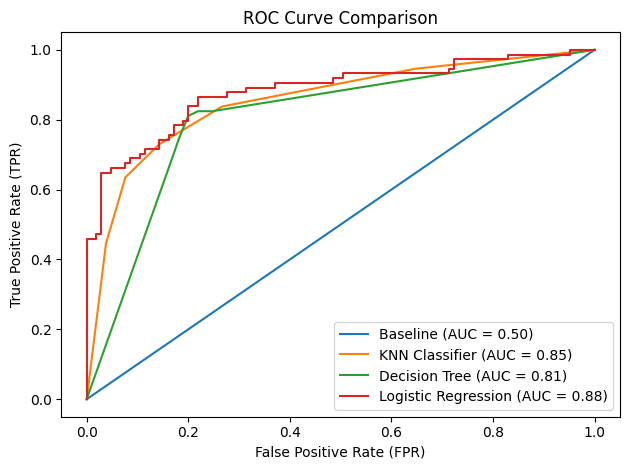

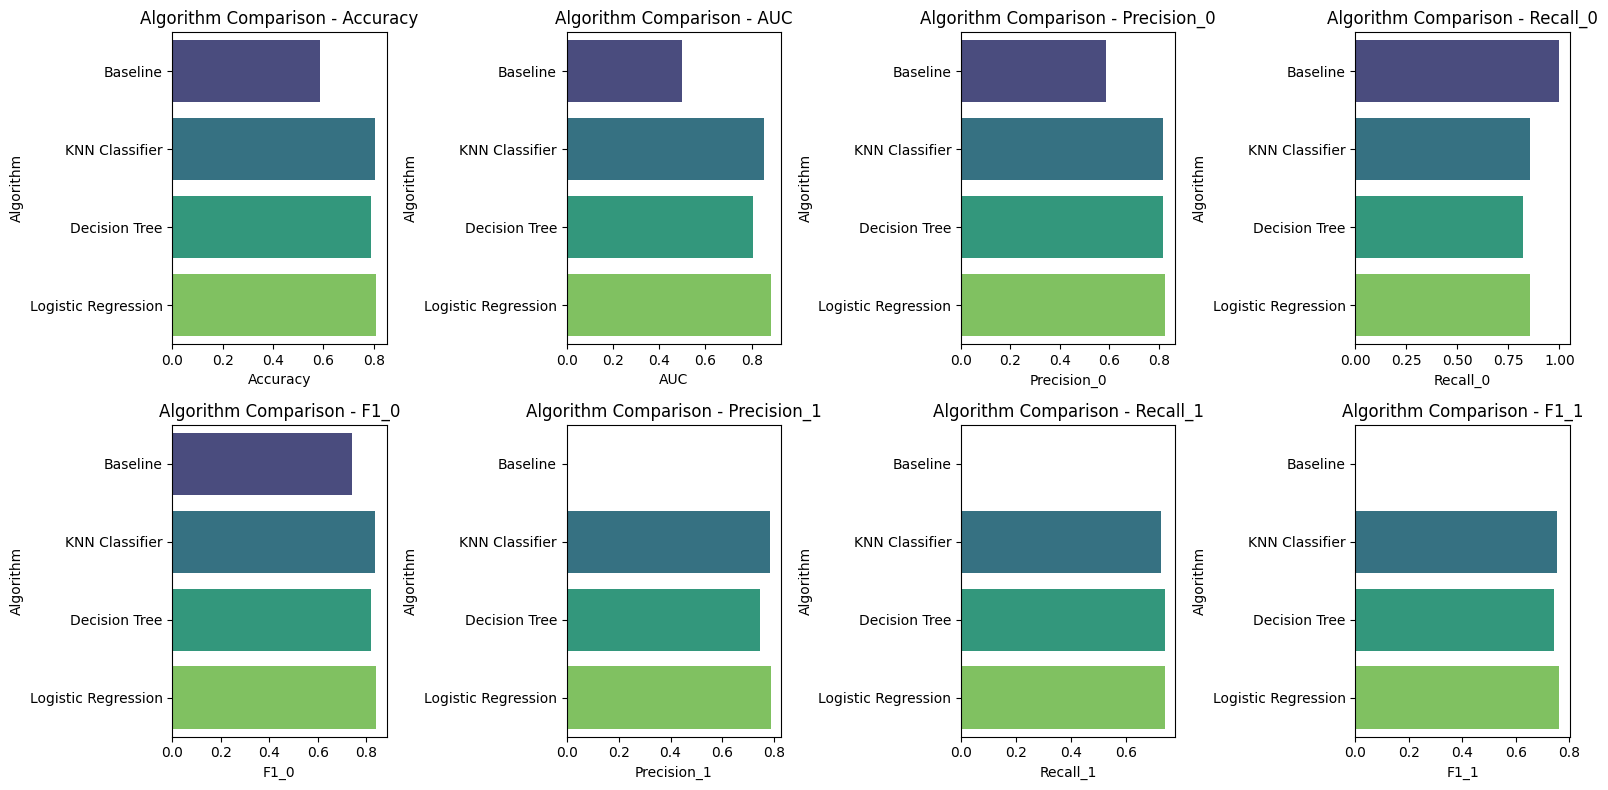

,Algorithm,Accuracy,AUC,Confusion Matrix,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1
0,Baseline,0.586592,0.500000,"[[105, 0], [74, 0]]",0.586592,1.000000,0.739437,0.000000,0.000000,0.000000
1,KNN Classifier,0.804469,0.854247,"[[90, 15], [20, 54]]",0.818182,0.857143,0.837209,0.782609,0.729730,0.755245
2,Decision Tree,0.787709,0.807336,"[[86, 19], [19, 55]]",0.819048,0.819048,0.819048,0.743243,0.743243,0.743243
3,Logistic Regression,0.810056,0.881982,"[[90, 15], [19, 55]]",0.825688,0.857143,0.841121,0.785714,0.743243,0.763889


In [102]:
# Define a list of algorithms
algorithms_to_evaluate = [
    ('Baseline', DummyClassifier(strategy='most_frequent')),
    ('KNN Classifier', KNeighborsClassifier(n_neighbors=5)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    # Add more algorithms as needed
]

# Evaluate the algorithms and get the results
results_df = evaluate_algorithms(algorithms_to_evaluate, X_train_scaled, X_test_scaled, y_train, y_test)

# Display the results
display(results_df)

## End Notes:

- Logistic Regression outperforms the other models in terms of accuracy and AUC.
- KNN Classifier and Decision Tree also show good performance.
- It's crucial to consider both precision and recall, especially when dealing with imbalanced datasets.
- The choice of the algorithm depends on the specific requirements and constraints of the problem, such as interpretability, computational efficiency, and the importance of false positives/negatives.
- Further fine-tuning of hyperparameters and feature engineering might improve the model performances.